### Wine Quality Prediction

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("/Users/faithlucykirabo/Downloads/wine+quality/winequality-red.csv", delimiter=';')
df2 = pd.read_csv("/Users/faithlucykirabo/Downloads/wine+quality/winequality-white.csv", delimiter=';')

df1['color'] = 'red'
df2['color'] = 'white'

df = pd.concat([df1,df2], axis =0, join='outer',)

df.head()
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


#### Data Breakdown

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [6]:
df.duplicated().sum()

1177

In [7]:
df[df.duplicated(keep=False)]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,white
4855,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white
4879,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,white


In [8]:
df = df.drop_duplicates()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [9]:
df['color'].value_counts()

color
white    3961
red      1359
Name: count, dtype: int64

In [10]:
print(f"Data Types:\n{df.dtypes}")

Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object


In [11]:
df['quality'].value_counts().sort_values()

quality
9       5
3      30
8     148
4     206
7     856
5    1752
6    2323
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

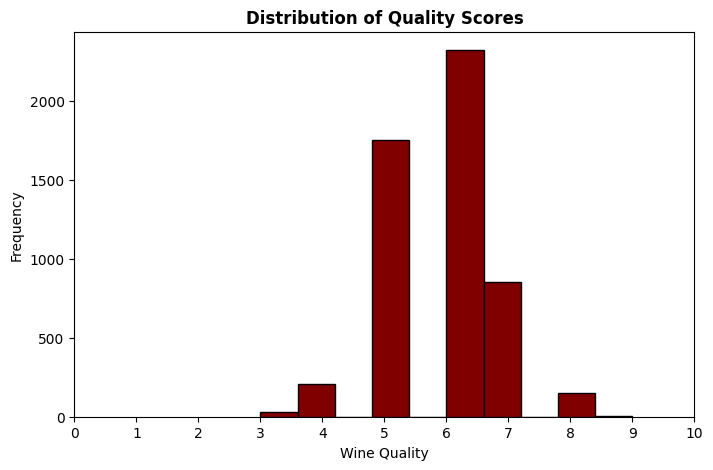

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.hist(df['quality'], bins=10, color='maroon', edgecolor = 'black', rwidth=1)
plt.xticks(np.arange(0,11,1))
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Quality Scores',fontweight = 'bold')

plt.show

In [13]:
df_num = df.drop(['color'],axis=1)
df_full = df_num.columns.tolist()
df_full

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [14]:
# Check for any anomalies
for col in df_full:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

fixed acidity: 304 outliers (5.7%)
volatile acidity: 279 outliers (5.2%)
citric acid: 143 outliers (2.7%)
residual sugar: 141 outliers (2.7%)
chlorides: 237 outliers (4.5%)
free sulfur dioxide: 44 outliers (0.8%)
total sulfur dioxide: 10 outliers (0.2%)
density: 3 outliers (0.1%)
pH: 49 outliers (0.9%)
sulphates: 163 outliers (3.1%)
alcohol: 1 outliers (0.0%)
quality: 183 outliers (3.4%)


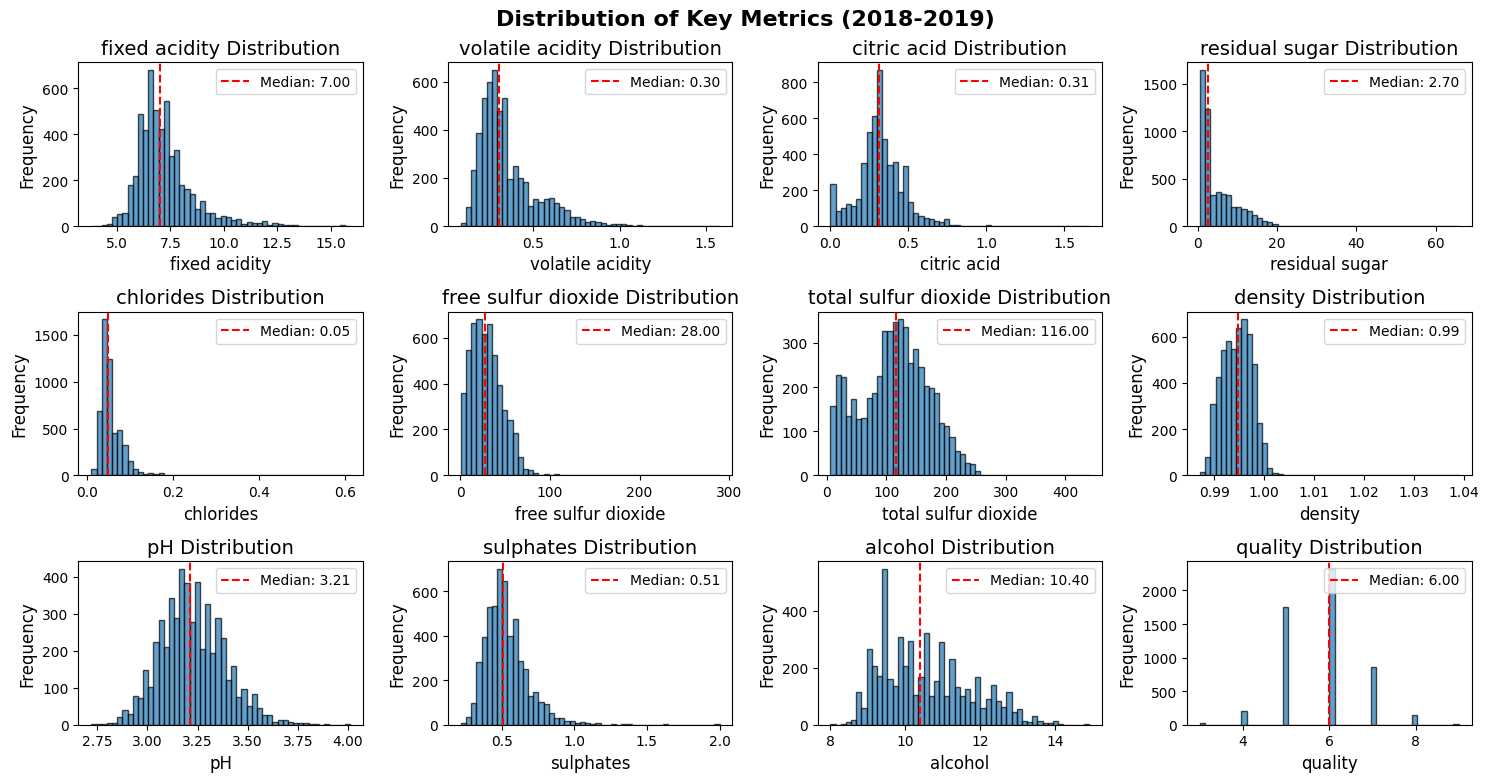

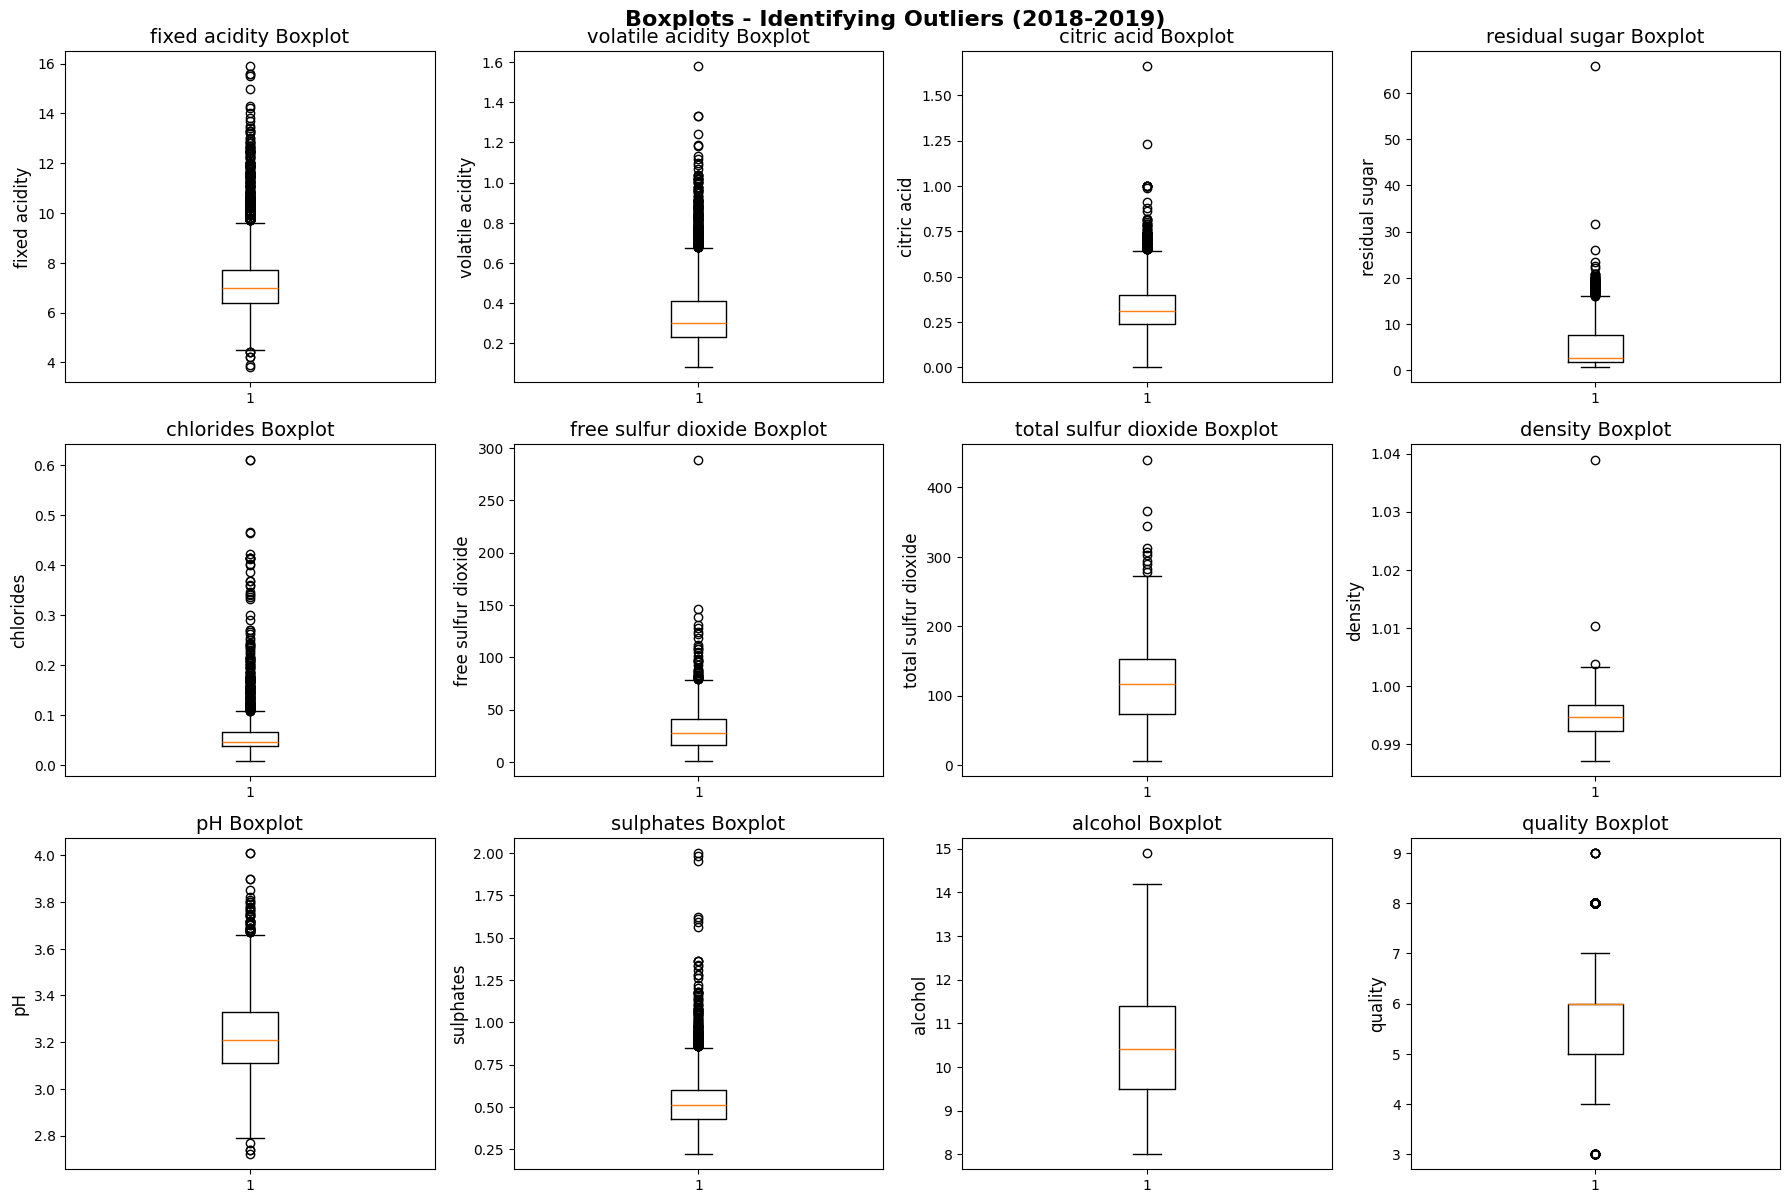

In [15]:
from matplotlib import pyplot as plt

metrics = df_full
rows = 4
cols = 4 

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
fig.suptitle('Distribution of Key Metrics (2018-2019)', fontsize=16, fontweight='bold')

axes = axes.flatten()

# Plot distributions
for idx, metric in enumerate(metrics):
    if metric in df.columns:
        ax = axes[idx]
        # Histogram
        ax.hist(df[metric], bins=50, edgecolor='black', alpha=0.7)
        ax.set_xlabel(metric, fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)
        ax.set_title(f'{metric} Distribution', fontsize=14)
        ax.axvline(df[metric].median(), color='red', linestyle='--', 
                   label=f'Median: {df[metric].median():.2f}')
        ax.legend()
# Hide empty subplots
for j in range(len(metrics), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Create boxplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 16))
fig.suptitle('Boxplots - Identifying Outliers (2018-2019)', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    if metric in df.columns:
        ax = axes[idx]
        ax.boxplot(df[metric], vert=True)
        ax.set_ylabel(metric, fontsize=12)
        ax.set_title(f'{metric} Boxplot', fontsize=14)
# Hide empty subplots
for j in range(len(metrics), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [16]:
df['dcolor'] = (df['color']=='red').astype(int)
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,dcolor
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white,0


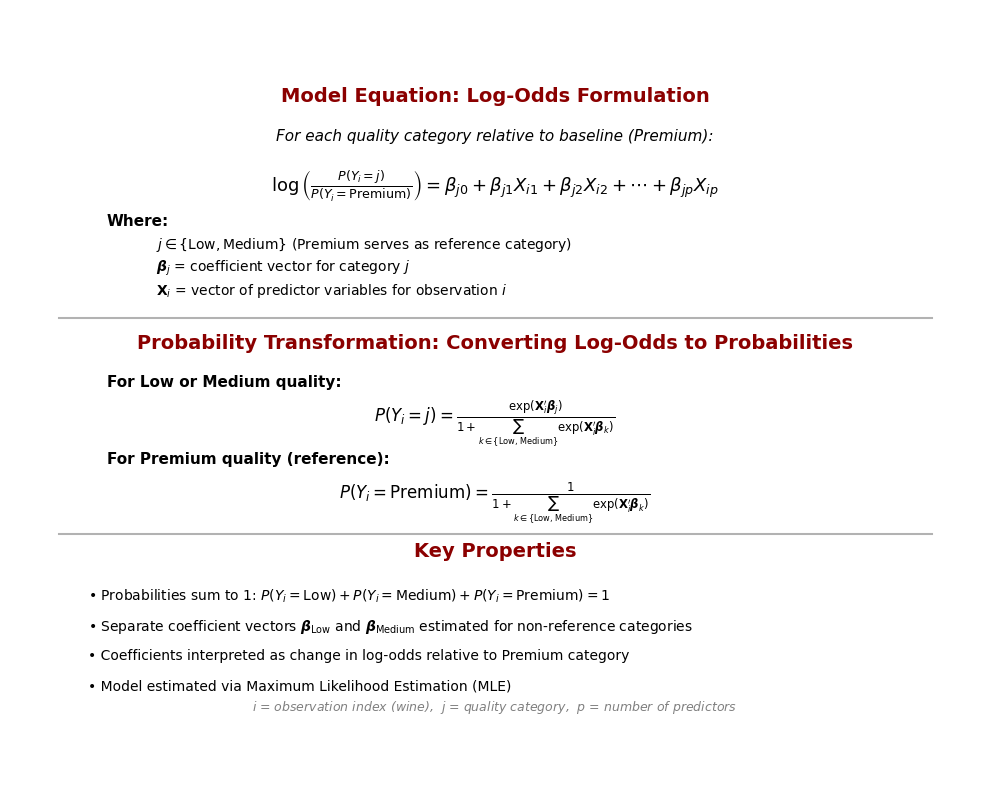

Equation image created successfully!


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Section 1: Log-odds equation
ax.text(5, 8.8, 'Model Equation: Log-Odds Formulation', 
        ha='center', fontsize=14, fontweight='bold', color='#8B0000')

ax.text(5, 8.3, r'For each quality category relative to baseline (Premium):', 
        ha='center', fontsize=11, style='italic')

# Main equation
equation1 = r'$\log\left(\frac{P(Y_i = j)}{P(Y_i = \mathrm{Premium})}\right) = \beta_{j0} + \beta_{j1}X_{i1} + \beta_{j2}X_{i2} + \cdots + \beta_{jp}X_{ip}$'
ax.text(5, 7.65, equation1, ha='center', fontsize=13)

# Where definitions
ax.text(1, 7.2, r'Where:', fontsize=11, fontweight='bold')
ax.text(1.5, 6.9, r'$j \in \{\mathrm{Low, Medium}\}$ (Premium serves as reference category)', fontsize=10)
ax.text(1.5, 6.6, r'$\boldsymbol{\beta}_j$ = coefficient vector for category $j$', fontsize=10)
ax.text(1.5, 6.3, r'$\mathbf{X}_i$ = vector of predictor variables for observation $i$', fontsize=10)

# Divider line
ax.plot([0.5, 9.5], [6.0, 6.0], 'k-', linewidth=1.5, alpha=0.3)

# Section 2: Probability transformations
ax.text(5, 5.6, 'Probability Transformation: Converting Log-Odds to Probabilities', 
        ha='center', fontsize=14, fontweight='bold', color='#8B0000')

# Probability for Low/Medium categories
ax.text(1, 5.1, r'For Low or Medium quality:', fontsize=11, fontweight='bold')
equation2 = r'$P(Y_i = j) = \frac{\exp(\mathbf{X}_i^{\prime}\boldsymbol{\beta}_j)}{1 + \sum_{k \in \{\text{Low, Medium}\}} \exp(\mathbf{X}_i^{\prime}\boldsymbol{\beta}_k)}$'
ax.text(5, 4.65, equation2, ha='center', fontsize=12)

# Probability for Premium category
ax.text(1, 4.1, r'For Premium quality (reference):', fontsize=11, fontweight='bold')
equation3 = r'$P(Y_i = \text{Premium}) = \frac{1}{1 + \sum_{k \in \{\text{Low, Medium}\}} \exp(\mathbf{X}_i^{\prime}\boldsymbol{\beta}_k)}$'
ax.text(5, 3.65, equation3, ha='center', fontsize=12)

# Divider line
ax.plot([0.5, 9.5], [3.2, 3.2], 'k-', linewidth=1.5, alpha=0.3)

# Section 3: Key properties
ax.text(5, 2.9, 'Key Properties', 
        ha='center', fontsize=14, fontweight='bold', color='#8B0000')

properties = [
    r'• Probabilities sum to 1: $P(Y_i = \mathrm{Low}) + P(Y_i = \mathrm{Medium}) + P(Y_i = \mathrm{Premium}) = 1$',
    r'• Separate coefficient vectors $\boldsymbol{\beta}_{\mathrm{Low}}$ and $\boldsymbol{\beta}_{\mathrm{Medium}}$ estimated for non-reference categories',
    r'• Coefficients interpreted as change in log-odds relative to Premium category',
    r'• Model estimated via Maximum Likelihood Estimation (MLE)'
]

y_pos = 2.5
for prop in properties:
    ax.text(0.8, y_pos, prop, fontsize=10, verticalalignment='top')
    y_pos -= 0.4

# Bottom note
ax.text(5, 0.9, r'$i$ = observation index (wine),  $j$ = quality category,  $p$ = number of predictors', 
        ha='center', fontsize=9, style='italic', color='gray')

plt.tight_layout()
plt.savefig('multinomial_logistic_equations.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


In [18]:
# Create 3 bins for wine quality
df['qualitybin']= np.where(df['quality'] <=3, 'Low', #low
                           np.where(df['quality'] >= 7, 'High', 'Medium')) #HIGH, MEDIUM

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,dcolor,qualitybin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,1,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1,Medium
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,1,Medium


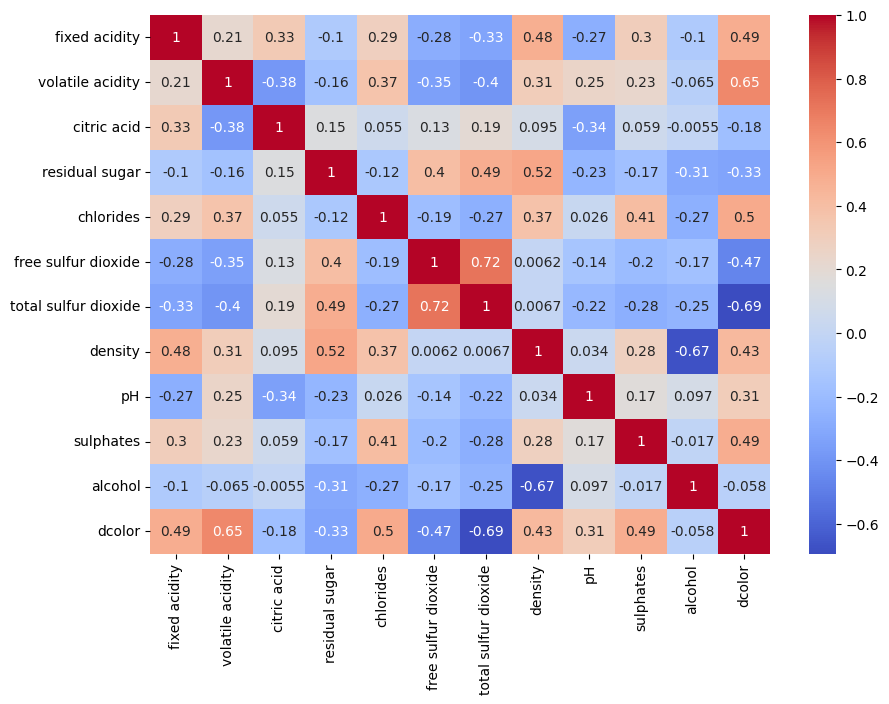

In [19]:
X = df.drop(['color','quality','qualitybin'],axis = 1)
plt.figure(figsize=(10,7))
sns.heatmap(X.corr(),annot = True, cmap = 'coolwarm')
plt.show()


In [20]:
from itertools import combinations
# Create interaction variables
inter_cols = X.columns.to_list()

inter_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'dcolor']

In [21]:
# create and add interaction terms  to features X, df
numerical_pairs = list(combinations(inter_cols,2))

interaction_features = {} # create dictionary to convert to df for concat
numerical_interactions = [] # store interaction column names list

for col1, col2 in numerical_pairs:
    interaction_name = f"{col1}_x_{col2}"

    # multiply the two elementwise
    interaction_features[interaction_name] = X[col1] * X[col2]

    # store the name
    numerical_interactions.append(interaction_name)

# Convert dictionary to df
interactions_df = pd.DataFrame(interaction_features)

# concat interaction features to X
X = pd.concat([X, interactions_df], axis = 1)

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,density_x_pH,density_x_sulphates,density_x_alcohol,density_x_dcolor,pH_x_sulphates,pH_x_alcohol,pH_x_dcolor,sulphates_x_alcohol,sulphates_x_dcolor,alcohol_x_dcolor
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,3.502278,0.558768,9.37932,0.9978,1.9656,32.994,3.51,5.264,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,3.189760,0.677824,9.76864,0.9968,2.1760,31.360,3.20,6.664,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,3.250220,0.648050,9.77060,0.9970,2.1190,31.948,3.26,6.370,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,3.153680,0.578840,9.78040,0.9980,1.8328,30.968,3.16,5.684,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,...,3.502278,0.558768,9.37932,0.9978,1.9656,32.994,3.51,5.264,0.56,9.4


In [22]:
X.shape

(5320, 78)

In [23]:
X.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'dcolor',
 'fixed acidity_x_volatile acidity',
 'fixed acidity_x_citric acid',
 'fixed acidity_x_residual sugar',
 'fixed acidity_x_chlorides',
 'fixed acidity_x_free sulfur dioxide',
 'fixed acidity_x_total sulfur dioxide',
 'fixed acidity_x_density',
 'fixed acidity_x_pH',
 'fixed acidity_x_sulphates',
 'fixed acidity_x_alcohol',
 'fixed acidity_x_dcolor',
 'volatile acidity_x_citric acid',
 'volatile acidity_x_residual sugar',
 'volatile acidity_x_chlorides',
 'volatile acidity_x_free sulfur dioxide',
 'volatile acidity_x_total sulfur dioxide',
 'volatile acidity_x_density',
 'volatile acidity_x_pH',
 'volatile acidity_x_sulphates',
 'volatile acidity_x_alcohol',
 'volatile acidity_x_dcolor',
 'citric acid_x_residual sugar',
 'citric acid_x_chlorides',
 'citric acid_x_free sulfur dioxide',
 'citric acid

In [24]:
X['so2_ratio']=X['free sulfur dioxide']/X['total sulfur dioxide']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,density_x_sulphates,density_x_alcohol,density_x_dcolor,pH_x_sulphates,pH_x_alcohol,pH_x_dcolor,sulphates_x_alcohol,sulphates_x_dcolor,alcohol_x_dcolor,so2_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.558768,9.37932,0.9978,1.9656,32.994,3.51,5.264,0.56,9.4,0.323529
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.677824,9.76864,0.9968,2.1760,31.360,3.20,6.664,0.68,9.8,0.373134
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.648050,9.77060,0.9970,2.1190,31.948,3.26,6.370,0.65,9.8,0.277778
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.578840,9.78040,0.9980,1.8328,30.968,3.16,5.684,0.58,9.8,0.283333
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,...,0.558768,9.37932,0.9978,1.9656,32.994,3.51,5.264,0.56,9.4,0.325000


In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Split the data into train test
y = df['qualitybin']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test,  columns=X.columns)


In [26]:
# For multinomial logistic regression, use both AIC and BIC, 
# as they serve different goals: AIC favors predictive accuracy 
# (potentially complex models), while BIC prioritizes parsimony 
# (simpler, interpretable models that find the "true" structure).
#  When they disagree, it highlights a trade-off, and your research 
# question (prediction vs. understanding data structure) dictates the choice


In [27]:
import statsmodels.api as sm

def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out=0.05, 
                       criterion='bic', direction='both', verbose=True):
    """
    Perform stepwise feature selection for linear regression.
    
    This function replicates R's stepAIC() from the MASS package, implementing
    forward, backward, or bidirectional stepwise selection using AIC or BIC criteria.
    
    Parameters:
    -----------
    X : pandas.DataFrame
        Feature matrix with all candidate predictors
    y : pandas.Series or array
        Target variable (should be continuous for OLS)
    initial_list : list, default=[]
        Initial list of features to start with (empty for forward selection)
    threshold_in : float, default=0.01
        P-value threshold for adding a variable (forward step)
    threshold_out : float, default=0.05
        P-value threshold for removing a variable (backward step)
    criterion : str, default='bic'
        Information criterion to minimize ('aic' or 'bic')
        BIC penalizes complexity more than AIC, reducing overfitting
    direction : str, default='both'
        Direction of selection: 'forward', 'backward', or 'both'
    verbose : bool, default=True
        Print detailed progress information
        
    Returns:
    --------
    selected_features : list
        Final list of selected feature names
    model : statsmodels regression model
        Fitted model with selected features
        
    Algorithm:
    ----------
    1. Start with initial feature set (empty for forward, all for backward)
    2. FORWARD STEP: Try adding each excluded variable
       - Fit model with candidate variable added
       - Compute information criterion (AIC/BIC)
       - Add variable with best (lowest) criterion if p-value < threshold_in
    3. BACKWARD STEP: Try removing each included variable
       - Fit model with candidate variable removed
       - Compute information criterion
       - Remove variable with best criterion if p-value > threshold_out
    4. CONVERGENCE: Stop when no variables can be added or removed
    5. Return final model and selected features
    
    Information Criteria:
    --------------------
    AIC = -2*log(L) + 2*k
    BIC = -2*log(L) + log(n)*k
    
    Where:
    - L = likelihood of the model
    - k = number of parameters (features + intercept)
    - n = number of observations
    
    BIC penalizes model complexity more heavily (log(n) > 2 when n > 7),
    leading to more parsimonious models and better protection against overfitting.
    
    Example:
    --------
    >>> selected, model = stepwise_selection(X, y, criterion='bic', direction='both')
    >>> print(f"Selected {len(selected)} features")
    >>> print(model.summary())
    """
    
    # Input validation
    if criterion not in ['aic', 'bic']:
        raise ValueError("criterion must be 'aic' or 'bic'")
    if direction not in ['forward', 'backward', 'both']:
        raise ValueError("direction must be 'forward', 'backward', or 'both'")
    
    # Initialize
    included = list(initial_list)  # Features currently in the model
    excluded = [col for col in X.columns if col not in included]  # Candidates

    # Set initial feature set based on direction
    if direction == 'backward':
        included = list(X.columns)
        excluded = []
    
    if verbose:
        print(f"STEPWISE SELECTION: {direction.upper()} direction, {criterion.upper()} criterion")
        print(f"Starting with {len(included)} features")
        print(f"Candidates: {len(excluded)} features")
        print(f"Threshold IN: p < {threshold_in}")
        print(f"Threshold OUT: p > {threshold_out}\n")
    
    # Track best criterion value
    if len(included) > 0:
        X_included = sm.add_constant(X[included], has_constant='add')
        model = sm.MNLogit(y, X_included).fit(disp=False)
        best_criterion = model.bic if criterion == 'bic' else model.aic
    else:
        best_criterion = np.inf
    
    step = 0
    max_steps = 1000  # Prevent infinite loops
    
    # Main stepwise loop
    while step < max_steps:
        step += 1
        changed = False
        
        if verbose:
            print(f"STEP {step}: Current features = {len(included)}")
        
        # FORWARD STEP: Try adding variables
        if direction in ['forward', 'both'] and len(excluded) > 0:
            if verbose:
                print(f"\n--- Forward Step: Evaluating {len(excluded)} candidates ---")
            
            # Try adding each excluded variable
            forward_candidates = []
            
            for candidate in excluded:
                # Fit model with candidate added
                test_features = included + [candidate]
                X_test = sm.add_constant(X[test_features])
                
                try:
                    model_test = sm.MNLogit(y, X_test).fit(disp=False)
                    criterion_value = model_test.bic if criterion == 'bic' else model_test.aic
                except:
                    criterion_value = np.inf
                
                forward_candidates.append({
                    'feature': candidate,
                    'criterion': criterion_value
                })
            
            # Sort by criterion (lower is better)
            forward_candidates = sorted(forward_candidates, key=lambda x: x['criterion'])
            
            # Select best candidate if it improves criterion and passes p-value threshold
            if len(forward_candidates) > 0:
                best_forward = forward_candidates[0]
                
                if verbose:
                    print(f"\nBest candidate to add: {best_forward['feature']}")
                    print(f"  {criterion.upper()}: {best_forward['criterion']:.2f} (current: {best_criterion:.2f})")
                
                # Add if criterion improves and p-value is significant
                if best_forward['criterion'] < best_criterion:
                    
                    included.append(best_forward['feature'])
                    excluded.remove(best_forward['feature'])
                    best_criterion = best_forward['criterion']
                    changed = True
                    
                    if verbose:
                        print(f"  ✓ ADDED: {best_forward['feature']}")
                        print(f"  New {criterion.upper()}: {best_criterion:.2f}")
                else:
                    if verbose:
                        if best_forward['criterion'] >= best_criterion:
                            print(f"  ✗ No improvement in {criterion.upper()}")

        
        # BACKWARD STEP: Try removing variables
        if direction in ['backward', 'both'] and len(included) > 0:
            if verbose:
                print(f"\n--- Backward Step: Evaluating {len(included)} current features ---")
            
            # Try removing each included variable
            backward_candidates = []
            
            for candidate in included:
                # Fit model with candidate removed
                test_features = [f for f in included if f != candidate]
                
                if len(test_features) > 0:
                    X_test = sm.add_constant(X[test_features])
                    try:
                        model_test = sm.MNLogit(y, X_test).fit(disp=False)
                        criterion_value = model_test.bic if criterion == 'bic' else model_test.aic
                    except:
                        criterion_value = np.inf

                    
                    backward_candidates.append({
                        'feature': candidate,
                        'criterion': criterion_value
                    })
            
            # Sort by criterion (lower is better)
            backward_candidates = sorted(backward_candidates, key=lambda x: x['criterion'])
            
            # Select best candidate if it improves criterion and p-value is not significant
            if len(backward_candidates) > 0:
                best_backward = backward_candidates[0]
                
                if verbose:
                    print(f"\nBest candidate to remove: {best_backward['feature']}")
                    print(f"  {criterion.upper()} after removal: {best_backward['criterion']:.2f} (current: {best_criterion:.2f})")
                
                # Remove if criterion improves and p-value is not significant
                if (best_backward['criterion'] < best_criterion):
                    
                    included.remove(best_backward['feature'])
                    excluded.append(best_backward['feature'])
                    best_criterion = best_backward['criterion']
                    changed = True
                    
                    if verbose:
                        print(f"  ✓ REMOVED: {best_backward['feature']}")
                        print(f"  New {criterion.upper()}: {best_criterion:.2f}")
                else:
                    if verbose:
                        if best_backward['criterion'] >= best_criterion:
                            print(f" No improvement in {criterion.upper()}")
        
        # Check for convergence
        if not changed:
            if verbose:
                print(f"CONVERGENCE REACHED after {step} steps")
                print(f"No variables can be added or removed to improve {criterion.upper()}")
            break
    
    # Fit final model
    if len(included) > 0:
        X_final = sm.add_constant(X[included])
        final_model = sm.MNLogit(y, X_final).fit(disp=False)
    else:
        # Intercept-only model
        X_final = sm.add_constant(pd.DataFrame(np.ones(len(y))))
        final_model = sm.MNLogit(y, X_final).fit(disp=False)
        included = []
    
    if verbose:
        print(f"FINAL MODEL")
        print(f"Selected features: {len(included)}")
        print(f"Final {criterion.upper()}: {best_criterion:.2f}")
        print(f"Final {criterion.upper()}: {final_model.bic if criterion=='bic' else final_model.aic}")
        print(f"Log-likelihood: {final_model.llf:.2f}")
   
    return included, final_model

print("\nStepwise selection function defined successfully")


Stepwise selection function defined successfully


In [28]:
# AIC Selection

# Run stepwise selection starting with no predictors (forward)
# Using BIC criterion to minimize overfitting
selected_features, selected_model = stepwise_selection(
    X=X_train,
    y=y_train,
    initial_list=[],  # Start with no features
    criterion='aic',   # Use AIC
    direction='both',  # Allow both forward and backward steps
    threshold_in=0.01,  # Add if p < 0.01
    threshold_out=0.05, # Remove if p > 0.05
    verbose=True
)

print("FINAL MODEL SUMMARY")
print(selected_model.summary())

# Display selected variables
print("SELECTED VARIABLES")
print(f"\nTotal selected: {len(selected_features)} features")
print(f"\nSelected features:")


print("\nSELECTED VARIABLES AND COEFFICIENTS")
for i, feature in enumerate(selected_features, 1):
    coefs = selected_model.params.loc[feature]  # get row for the feature
    coef_str = ", ".join([f"class {cls}: {val:.4f}" for cls, val in coefs.items()])
    print(f"{i:3d}. {feature:30s} {coef_str}")

#'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'sulphates', 'alcohol', 'color', 'so2_ratio', 'free sulfur dioxide_x_total sulfur dioxide','volatile acidity_x_chlorides','fixed acidity_x_pH'

STEPWISE SELECTION: BOTH direction, AIC criterion
Starting with 0 features
Candidates: 79 features
Threshold IN: p < 0.01
Threshold OUT: p > 0.05

STEP 1: Current features = 0

--- Forward Step: Evaluating 79 candidates ---

Best candidate to add: alcohol
  AIC: 3707.57 (current: inf)
  ✓ ADDED: alcohol
  New AIC: 3707.57

--- Backward Step: Evaluating 1 current features ---
STEP 2: Current features = 1

--- Forward Step: Evaluating 78 candidates ---

Best candidate to add: volatile acidity
  AIC: 3591.82 (current: 3707.57)
  ✓ ADDED: volatile acidity
  New AIC: 3591.82

--- Backward Step: Evaluating 2 current features ---

Best candidate to remove: volatile acidity
  AIC after removal: 3707.57 (current: 3591.82)
 No improvement in AIC
STEP 3: Current features = 2

--- Forward Step: Evaluating 77 candidates ---

Best candidate to add: pH_x_sulphates
  AIC: 3551.63 (current: 3591.82)
  ✓ ADDED: pH_x_sulphates
  New AIC: 3551.63

--- Backward Step: Evaluating 3 current features ---

Best

/Users/faithlucykirabo/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Best candidate to add: total sulfur dioxide_x_dcolor
  AIC: 3321.63 (current: 3323.12)
  ✓ ADDED: total sulfur dioxide_x_dcolor
  New AIC: 3321.63

--- Backward Step: Evaluating 16 current features ---

Best candidate to remove: pH_x_sulphates
  AIC after removal: 3322.68 (current: 3321.63)
 No improvement in AIC
STEP 20: Current features = 16

--- Forward Step: Evaluating 63 candidates ---


/Users/faithlucykirabo/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Best candidate to add: chlorides_x_alcohol
  AIC: 3321.74 (current: 3321.63)
  ✗ No improvement in AIC

--- Backward Step: Evaluating 16 current features ---

Best candidate to remove: pH_x_sulphates
  AIC after removal: 3322.68 (current: 3321.63)
 No improvement in AIC
CONVERGENCE REACHED after 20 steps
No variables can be added or removed to improve AIC
FINAL MODEL
Selected features: 16
Final AIC: 3321.63
Final AIC: 3321.632161978493
Log-likelihood: -1626.82
FINAL MODEL SUMMARY
                          MNLogit Regression Results                          
Dep. Variable:             qualitybin   No. Observations:                 4256
Model:                        MNLogit   Df Residuals:                     4222
Method:                           MLE   Df Model:                           32
Date:                Wed, 11 Feb 2026   Pseudo R-squ.:                  0.2604
Time:                        12:41:46   Log-Likelihood:                -1626.8
converged:                       True   

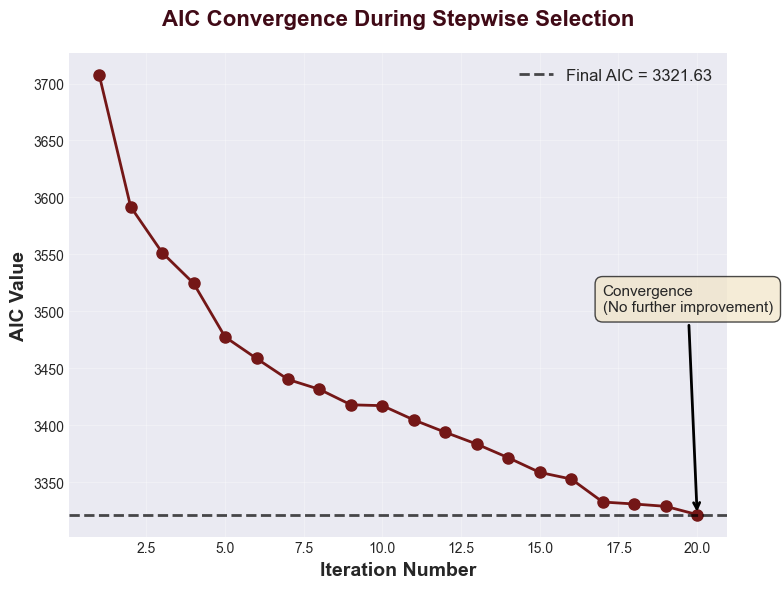

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set style for professional-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# VISUALIZATION: AIC CONVERGENCE PLOT

# Example AIC values across 20 iterations 
iterations = list(range(1, 21))
aic_values = [
    3707.57, 3591.82, 3551.63, 3524.61, 3477.57, 3458.66, 3440.25, 3431.56, 3417.99, 3417.26,
    3404.70, 3393.85, 3383.48, 3371.52, 3358.63, 3352.84, 3332.68, 3330.94, 3328.88, 3321.63
]  #  values from your stepwise process

plt.figure(figsize=(8, 6))
plt.plot(iterations, aic_values, marker='o', linewidth=2, markersize=8, color='#741717')
plt.axhline(y=3321.63, color='black', linestyle='--', linewidth=2, alpha=0.7, label='Final AIC = 3321.63')
plt.xlabel('Iteration Number', fontsize=14, fontweight='bold')
plt.ylabel('AIC Value', fontsize=14, fontweight='bold')
plt.title('AIC Convergence During Stepwise Selection', fontsize=16, fontweight='bold', pad=20, color = '#400A16')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Annotate final point
plt.annotate('Convergence\n(No further improvement)', 
             xy=(20, 3321.63), 
             xytext=(17, 3500),
             fontsize=11,
             arrowprops=dict(arrowstyle='->', color='black', lw=2),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='#F2e5C6', alpha=0.7))

plt.tight_layout()
plt.savefig('aic_convergence_plot.png', dpi=300, bbox_inches='tight')
plt.show()


In [30]:
# BIC Selection

# Run stepwise selection starting with no predictors (forward)
# Using BIC criterion to minimize overfitting
selected_features, selected_model = stepwise_selection(
    X=X_train,
    y=y_train,
    initial_list=[],  # Start with no features
    criterion='bic',   # Use BIC (more conservative than AIC)
    direction='both',  # Allow both forward and backward steps
    threshold_in=0.01,  # Add if p < 0.01
    threshold_out=0.05, # Remove if p > 0.05
    verbose=True
)

print("FINAL MODEL SUMMARY")
print(selected_model.summary())

# Display selected variables
print("SELECTED VARIABLES")
print(f"\nTotal selected: {len(selected_features)} features")

print(f"\nSelected features:")
print("\nSELECTED VARIABLES AND COEFFICIENTS")
for i, feature in enumerate(selected_features, 1):
    coefs = selected_model.params.loc[feature]  # get row for the feature
    coef_str = ", ".join([f"class {cls}: {val:.4f}" for cls, val in coefs.items()])
    print(f"{i:3d}. {feature:30s} {coef_str}")

STEPWISE SELECTION: BOTH direction, BIC criterion
Starting with 0 features
Candidates: 79 features
Threshold IN: p < 0.01
Threshold OUT: p > 0.05

STEP 1: Current features = 0

--- Forward Step: Evaluating 79 candidates ---

Best candidate to add: alcohol
  BIC: 3733.00 (current: inf)
  ✓ ADDED: alcohol
  New BIC: 3733.00

--- Backward Step: Evaluating 1 current features ---
STEP 2: Current features = 1

--- Forward Step: Evaluating 78 candidates ---

Best candidate to add: volatile acidity
  BIC: 3629.96 (current: 3733.00)
  ✓ ADDED: volatile acidity
  New BIC: 3629.96

--- Backward Step: Evaluating 2 current features ---

Best candidate to remove: volatile acidity
  BIC after removal: 3733.00 (current: 3629.96)
 No improvement in BIC
STEP 3: Current features = 2

--- Forward Step: Evaluating 77 candidates ---

Best candidate to add: pH_x_sulphates
  BIC: 3602.48 (current: 3629.96)
  ✓ ADDED: pH_x_sulphates
  New BIC: 3602.48

--- Backward Step: Evaluating 3 current features ---

Best

/var/folders/l5/gm6rtbfs5zddk2ds5xs08qtm0000gn/T/ipykernel_1286/2704044767.py:66: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/l5/gm6rtbfs5zddk2ds5xs08qtm0000gn/T/ipykernel_1286/2704044767.py:67: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.savefig('aic_decision_rationale.png', dpi=300, bbox_inches='tight')
/Users/faithlucykirabo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


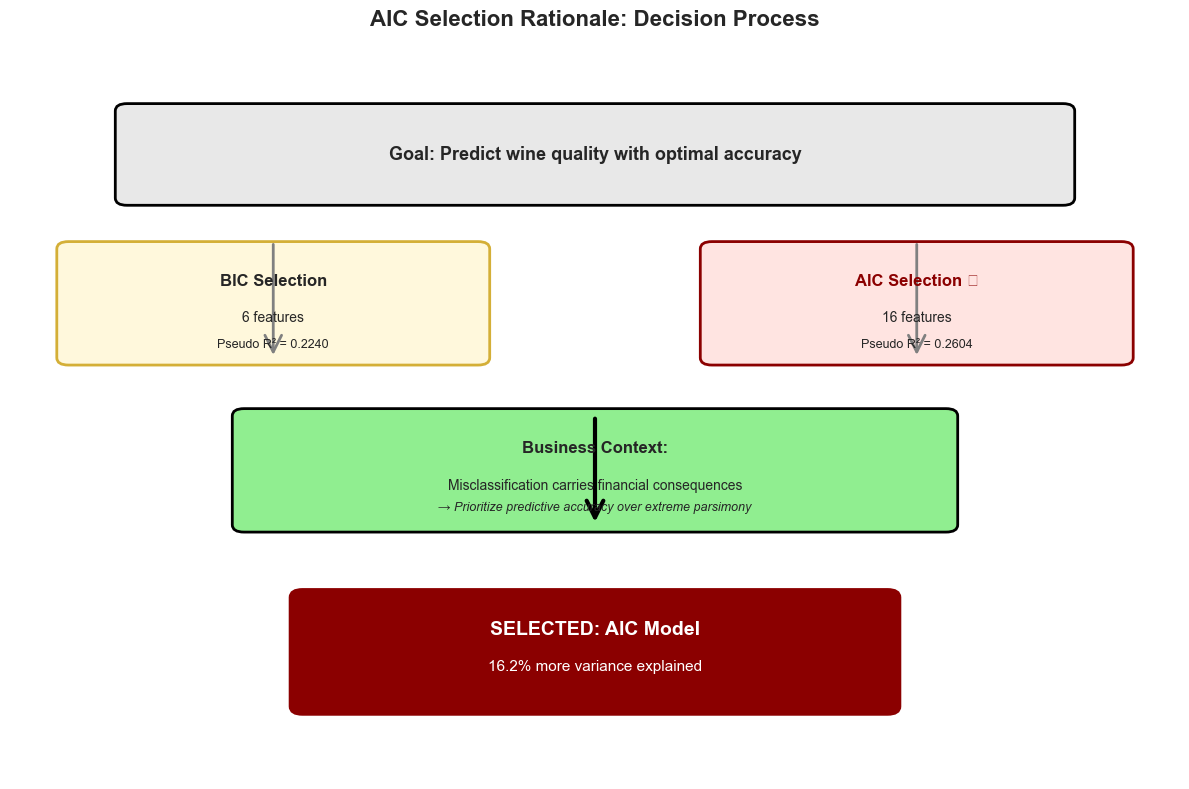

In [31]:
# Visual story of why AIC was chosen over BIC

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Define boxes
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# Starting point
box1 = FancyBboxPatch((1, 8), 8, 1.2, boxstyle="round,pad=0.1", 
                       edgecolor='black', facecolor='#E8E8E8', linewidth=2)
ax.add_patch(box1)
ax.text(5, 8.6, 'Goal: Predict wine quality with optimal accuracy', 
        ha='center', va='center', fontsize=13, fontweight='bold')

# Two options
box2a = FancyBboxPatch((0.5, 5.8), 3.5, 1.5, boxstyle="round,pad=0.1",
                        edgecolor='#D4AF37', facecolor='#FFF8DC', linewidth=2)
ax.add_patch(box2a)
ax.text(2.25, 6.8, 'BIC Selection', ha='center', fontsize=12, fontweight='bold')
ax.text(2.25, 6.3, '6 features', ha='center', fontsize=10)
ax.text(2.25, 5.95, 'Pseudo R² = 0.2240', ha='center', fontsize=9)

box2b = FancyBboxPatch((6, 5.8), 3.5, 1.5, boxstyle="round,pad=0.1",
                        edgecolor='#8B0000', facecolor='#FFE4E1', linewidth=2)
ax.add_patch(box2b)
ax.text(7.75, 6.8, 'AIC Selection ✓', ha='center', fontsize=12, fontweight='bold', color='#8B0000')
ax.text(7.75, 6.3, '16 features', ha='center', fontsize=10)
ax.text(7.75, 5.95, 'Pseudo R² = 0.2604', ha='center', fontsize=9)

# Decision criteria
box3 = FancyBboxPatch((2, 3.5), 6, 1.5, boxstyle="round,pad=0.1",
                       edgecolor='black', facecolor='#90EE90', linewidth=2)
ax.add_patch(box3)
ax.text(5, 4.5, 'Business Context:', ha='center', fontsize=12, fontweight='bold')
ax.text(5, 4.0, 'Misclassification carries financial consequences', ha='center', fontsize=10)
ax.text(5, 3.7, '→ Prioritize predictive accuracy over extreme parsimony', ha='center', fontsize=9, style='italic')

# Final decision
box4 = FancyBboxPatch((2.5, 1), 5, 1.5, boxstyle="round,pad=0.1",
                       edgecolor='#8B0000', facecolor='#8B0000', linewidth=3)
ax.add_patch(box4)
ax.text(5, 2.0, 'SELECTED: AIC Model', ha='center', fontsize=14, fontweight='bold', color='white')
ax.text(5, 1.5, '16.2% more variance explained', ha='center', fontsize=11, color='white')

# Arrows
arrow1 = FancyArrowPatch((2.25, 7.4), (2.25, 5.8), arrowstyle='->', 
                         mutation_scale=30, linewidth=2, color='gray')
ax.add_patch(arrow1)

arrow2 = FancyArrowPatch((7.75, 7.4), (7.75, 5.8), arrowstyle='->', 
                         mutation_scale=30, linewidth=2, color='gray')
ax.add_patch(arrow2)

arrow3 = FancyArrowPatch((5, 5.0), (5, 3.5), arrowstyle='->', 
                         mutation_scale=30, linewidth=3, color='black')
ax.add_patch(arrow3)

arrow4 = FancyArrowPatch((5, 2.5), (5, 1.5), arrowstyle='->', 
                         mutation_scale=30, linewidth=3, color='#8B0000')
ax.add_patch(arrow4)

plt.title('AIC Selection Rationale: Decision Process', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('aic_decision_rationale.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
full_features = ['volatile acidity', 
                 'fixed acidity',
                 'residual sugar', 
                 'chlorides', 'sulphates', 
                 'alcohol', 
                 'dcolor',
                # 'pH_x_sulphates', 
                 'free sulfur dioxide_x_alcohol',
                 'chlorides_x_total sulfur dioxide' 
                # 'volatile acidity_x_alcohol'
                # 'free sulfur dioxide_x_total sulfur dioxide'
                ]

# ['volatile acidity',
                #  'citric acid',
                # 'dcolor', 
                #'density',
                # 'alcohol',
                # 'pH_x_sulphates', 
                #'free sulfur dioxide_x_alcohol',
                # 'chlorides_x_total sulfur dioxide' , 
                # 'volatile acidity_x_alcohol'
                #'free sulfur dioxide_x_total sulfur dioxide'
                

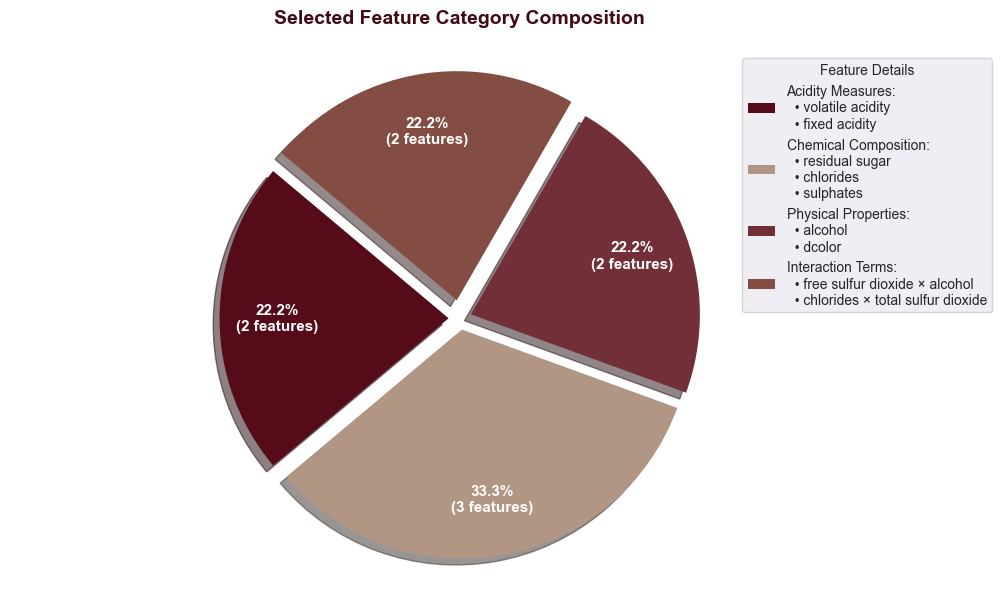

In [33]:
# PIE CHART: FEATURE COMPOSITION BY CATEGORY (GROUPED)

# Group the 9 features into meaningful categories
feature_categories = {
    'Acidity Measures': [
        'volatile acidity',
        'fixed acidity'
    ],
    'Chemical Composition': [
        'residual sugar',
        'chlorides',
        'sulphates'
    ],
    'Physical Properties': [
        'alcohol',
        'dcolor'
    ],
    'Interaction Terms': [
        'free sulfur dioxide × alcohol',
        'chlorides × total sulfur dioxide'
    ]
}

# Count features in each category
category_counts = {cat: len(feats) for cat, feats in feature_categories.items()}

# Extract labels and values
labels = list(category_counts.keys())
sizes = list(category_counts.values())

# Wine-inspired color palette (4 distinct colors for 4 categories)
wine_colors = [
    '#560B18',  # Dark red - Acidity (sharp, critical to taste)
    '#B19684',  # Gold - Chemical Composition (complex blend)
    '#722F37',  # Deep burgundy - Physical Properties (body of wine)
    '#844D43',  # Purple - Interactions (blending effects)
]

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create pie chart with explosion for emphasis
explode = (0.05, 0.05, 0.05, 0.08)  # Slightly emphasize interactions

wedges, texts, autotexts = ax.pie(
    sizes, 
#    labels=labels,
    autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(sizes))} features)',
    colors=wine_colors,
    startangle=140,
    textprops={'fontsize': 12, 'fontweight': 'bold'},
    explode=explode,
    shadow=True,
    pctdistance=0.75
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Style the labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Add title with context
ax.set_title('Selected Feature Category Composition', 
             fontsize=14, fontweight='bold', pad=20, color ='#400A16')

# Add legend with feature details
legend_labels = []
for cat, feats in feature_categories.items():
    feat_list = '\n  • '.join(feats)
    legend_labels.append(f"{cat}:\n  • {feat_list}")

ax.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1), 
          fontsize=10, frameon=True, title='Feature Details', title_fontsize=10)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.tight_layout()
plt.show()


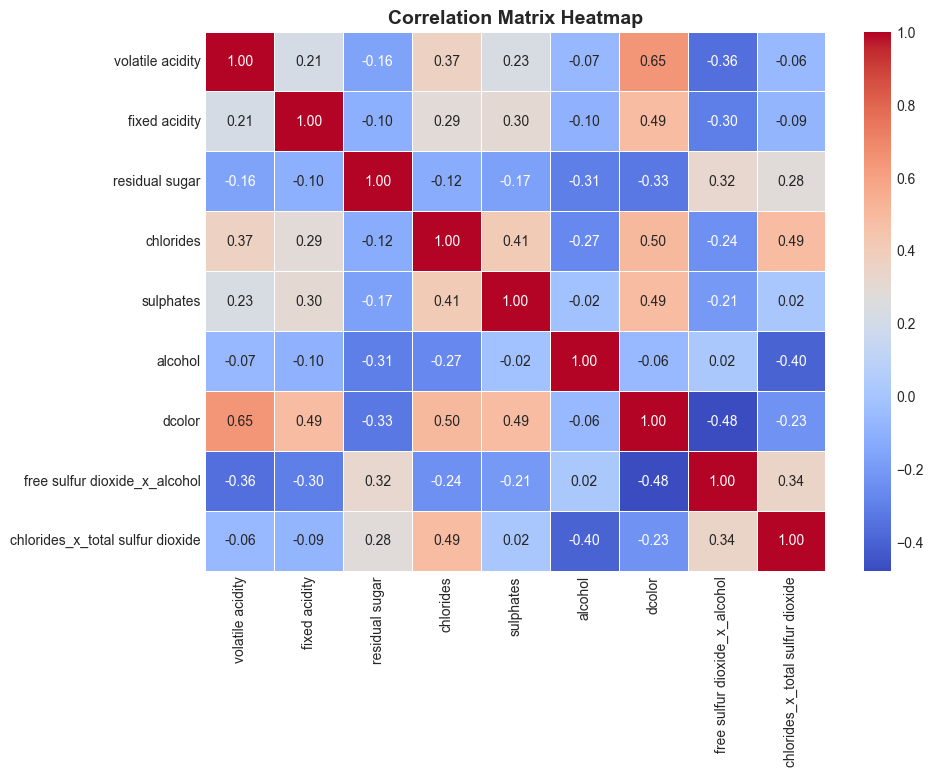

In [34]:
# Final chosen variables: CORRELATION MATRIX
corr_matrix = X[full_features].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap", fontsize=14, fontweight='bold')
plt.show()

In [35]:
# Final chosen variables: CORRELATION MATRIX
corr_matrix = X[full_features].corr()

print("Correlation Matrix")
print(corr_matrix)
print("\n")

# MULTICOLLINEARITY SUMMARY
# Find pairs with high correlation (>|0.75|) but avoid duplicates & self-correlation
high_corr_pairs = []

for i in range(len(full_features)):
    for j in range(i+1, len(full_features)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) >= 0.75:
            high_corr_pairs.append((full_features[i], full_features[j], corr_value))

print("High Correlation Pairs (|r| ≥ 0.75)")
if high_corr_pairs:
    for f1, f2, val in high_corr_pairs:
        print(f"{f1}  <-->  {f2}:  r = {val:.3f}")
else:
    print("No strong multicollinearity detected.")

Correlation Matrix
                                  volatile acidity  fixed acidity  \
volatile acidity                          1.000000       0.214752   
fixed acidity                             0.214752       1.000000   
residual sugar                           -0.163696      -0.104439   
chlorides                                 0.367626       0.288918   
sulphates                                 0.227772       0.304844   
alcohol                                  -0.065411      -0.102573   
dcolor                                    0.645335       0.486253   
free sulfur dioxide_x_alcohol            -0.361899      -0.304460   
chlorides_x_total sulfur dioxide         -0.058456      -0.086053   

                                  residual sugar  chlorides  sulphates  \
volatile acidity                       -0.163696   0.367626   0.227772   
fixed acidity                          -0.104439   0.288918   0.304844   
residual sugar                          1.000000  -0.123094  -0.1747

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = full_features
vif_data["VIF"] = [
    variance_inflation_factor(X[full_features].values, i)
    for i in range(len(full_features))
]

print("VIF Scores")
print(vif_data)

VIF Scores
                            feature        VIF
0                  volatile acidity   9.160339
1                     fixed acidity  32.471394
2                    residual sugar   2.866250
3                         chlorides  10.477873
4                         sulphates  18.858088
5                           alcohol  40.176677
6                            dcolor   5.061185
7     free sulfur dioxide_x_alcohol   6.591612
8  chlorides_x_total sulfur dioxide   8.121199


In [37]:
# MULTINOMIAL MODEL
# Complementary Log-Log (Cloglog) Link Function: This function is ideal for skewed data 
# where outcomes are either rare or very likely, emphasizing rapid probability increases
#model = LogisticRegression(
#    multi_class="multinomial",
 #   solver="lbfgs",
  #  max_iter=1000)

#model.fit(X_train[full_features], y_train)

X_full = sm.add_constant(X_train[full_features])
final_model = sm.MNLogit(y_train, X_full).fit()
print(final_model.summary())


Optimization terminated successfully.
         Current function value: 0.403027
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:             qualitybin   No. Observations:                 4256
Model:                        MNLogit   Df Residuals:                     4236
Method:                           MLE   Df Model:                           18
Date:                Wed, 11 Feb 2026   Pseudo R-squ.:                  0.2202
Time:                        12:42:08   Log-Likelihood:                -1715.3
converged:                       True   LL-Null:                       -2199.6
Covariance Type:            nonrobust   LLR p-value:                3.555e-194
                  qualitybin=Low       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.7953      2.864      0.6

In [42]:
from sklearn.metrics import accuracy_score, classification_report

# Check what classes your model learned
print("Unique values in y_train:", sorted(y_train.unique()))
print("Unique values in y_test:", sorted(y_test.unique()))

# Create mapping (statsmodels uses alphabetical order)
unique_classes = sorted(y_train.unique())
class_mapping = {i: label for i, label in enumerate(unique_classes)}
print("\nClass mapping:", class_mapping)
# Expected output: {0: 'High', 1: 'Low', 2: 'Medium'} or similar

# Map predictions
y_pred_labels = y_pred_class.map(class_mapping)

# Verify the mapping worked
print("\nSample predictions:")
print("Integer:", y_pred_class[:5].values)
print("Labels:", y_pred_labels[:5].values)

# Calculate metrics
print("\nAccuracy:", accuracy_score(y_test, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

Unique values in y_train: ['High', 'Low', 'Medium']
Unique values in y_test: ['High', 'Low', 'Medium']

Class mapping: {0: 'High', 1: 'Low', 2: 'Medium'}

Sample predictions:
Integer: [2 2 0 2 2]
Labels: ['Medium' 'Medium' 'High' 'Medium' 'Medium']

Accuracy: 0.8073308270676691

Classification Report:
               precision    recall  f1-score   support

        High       0.59      0.24      0.34       216
         Low       0.00      0.00      0.00         4
      Medium       0.83      0.96      0.89       844

    accuracy                           0.81      1064
   macro avg       0.47      0.40      0.41      1064
weighted avg       0.78      0.81      0.77      1064



# Wine Quality Prediction Results

## Overall Performance
The multinomial logistic regression model achieved an **overall accuracy of 80.7%** in predicting wine quality categories based on physicochemical properties.

## Performance by Quality Category

### Medium Quality (Strong Performance)
- **F1-score:** 0.89
- **Recall:** 96%
- **Sample size:** 844 wines
- The model excels at identifying medium-quality wines, correctly classifying nearly all instances in this category.

### High Quality (Poor Performance)
- **F1-score:** 0.34
- **Recall:** 24%
- **Sample size:** 216 wines
- The model struggles to identify high-quality wines, correctly detecting only about 1 in 4 instances.

### Low Quality (Complete Failure)
- **F1-score:** 0.00
- **Recall:** 0%
- **Sample size:** 4 wines
- The model completely fails to predict low-quality wines, likely due to severe underrepresentation in the dataset.

## Key Insights

**Class Imbalance Problem:**
- The dataset is heavily skewed toward medium-quality wines (79% of samples)
- Minority classes (High: 20%, Low: 0.4%) are severely underrepresented
- This imbalance drives the misleadingly high overall accuracy

**Metric Disparity:**
- **Weighted avg F1-score:** 0.77 (reflects majority class dominance)
- **Macro avg F1-score:** 0.41 (reveals poor cross-class generalization)
- The 0.36-point gap indicates the model's performance is inflated by the majority class

## Recommendations

To improve model performance across all quality levels:

1. **Address class imbalance** using techniques like SMOTE, class weights, or undersampling the majority class
2. **Collect more samples** of high and low-quality wines for better representation
3. **Engineer additional features** that may better distinguish exceptional or poor-quality wines
4. **Consider alternative models** like Random Forest or Gradient Boosting that handle imbalanced data better
5. **Evaluate using stratified cross-validation** to ensure consistent performance across quality levels

If you are targeting medium quality wines, this model will almost always get you a great medium quality wine bottle!